In [1]:
import sys
import numpy
import pickle
import matplotlib.pyplot as plt, pandas as pd, matplotlib as mpl, random
def utkarshGrid(): plt.minorticks_on() ; plt.grid(color='grey',which='minor',linestyle=":",linewidth='0.1',) ; plt.grid(color='black',which='major',linestyle=":",linewidth='0.1',); return None
def utkarshGridAX(ax): ax.minorticks_on() ; ax.grid(color='grey',which='minor',linestyle=":",linewidth='0.1',) ; ax.grid(color='black',which='major',linestyle=":",linewidth='0.1',); return None
mpl.rcParams['legend.frameon'], mpl.rcParams['figure.autolayout'] = False, True,
colour = ["dodgerblue", "goldenrod", "crimson", "teal", "yellowgreen", "grey"]
plt.rcParams.update({"text.usetex": True, "font.family": "serif", "font.serif": ["Palatino"],})
def utkarshWrapper(): plt.legend();plt.utkarshGrid() ;plt.gca().tick_params(direction='in', which='both', right=True, top=True); plt.tight_layout(); return None
def utkarshWrapperAX(ax): utkarshGridAX(ax); ax.tick_params(direction='in', which='both', right=True, top=True); return None; 
plt.utkarshGrid = utkarshGrid; plt.utkarshWrapper = utkarshWrapper
def colour_sample(n = 2, col = colour, seed = 7236): random.seed(seed) ; return random.sample(colour, n)
plt.rcParams["image.cmap"] = "Set2" # I recommend, Set2, Dark2
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=colour) # Use your own OR plt.cm.Set2.colors

In [2]:
%reload_ext autoreload
%autoreload 2
from run_inference import *
from postprocessing_functions import *

/Users/utkarsh/GitHub/P_NS/venv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
mcmc = None
path = f"results/prior"
mcmc = pickle_read(path)
prior_samples = infer_samples(mcmc)

In [4]:
mcmc = None
path = f"results/posterior"
mcmc = pickle_read(path)
posterior_samples = infer_samples(mcmc)
mcmc.print_summary()


                         mean       std    median      5.0%     95.0%     n_eff     r_hat
               A[0]      0.03      0.57      0.05     -0.84      0.93   5044.12      1.00
         alpha_1[0]     -1.46      1.57     -1.26     -4.15      0.88   2307.15      1.00
         alpha_2[0]     -0.17      0.48     -0.17     -0.97      0.63   1232.88      1.00
          beta_1[0]      1.36      0.87      1.15      0.20      2.38    709.27      1.00
          beta_2[0]      2.30      0.94      2.17      0.79      3.81   1632.48      1.00
        eta_high[0]     25.25     14.45     25.32      4.73     49.62   7892.65      1.00
         eta_low[0]     24.71     14.32     24.68      0.90     45.67   8541.53      1.00
         eta_max[0]      4.62      2.67      4.44      0.01      8.48   5954.95      1.00
         eta_min[0]     30.51     11.39     30.85     14.51     49.92   7868.60      1.00
      gamma_high[0]      6.02      1.17      6.00      4.37      8.00   6740.44      1.00
       ga

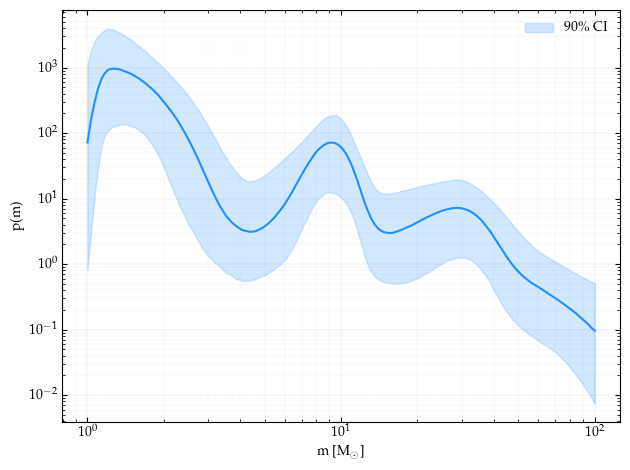

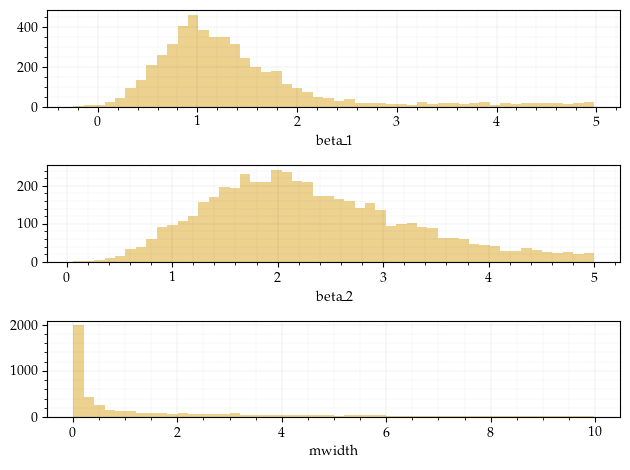

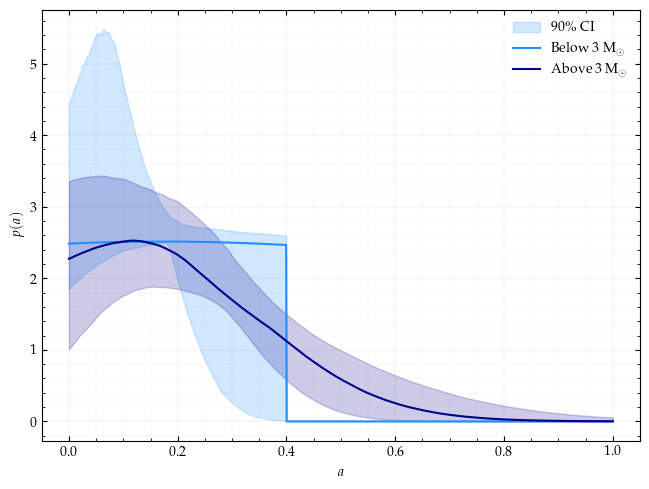

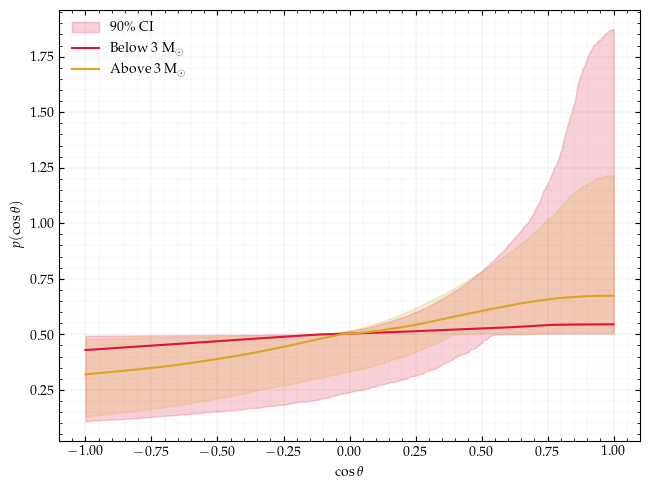

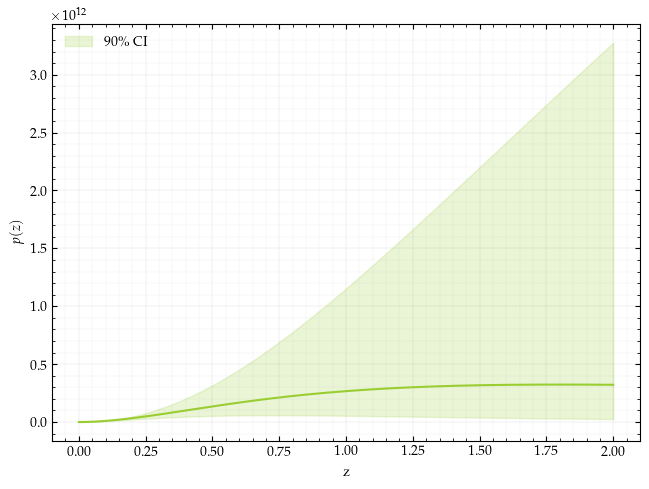

In [5]:
try:
    from config.mass1d_func import pdb_with_NG as mass1d_func
except:
    from config.mass1d_func import multi_pdb as mass1d_func
from config.spin_func import prob_chi, prob_costilt
from config.distance_func import powerlaw_redshift

plot_p_m(posterior_samples, function=mass1d_func)
plot_p_pairing(posterior_samples)
plot_p_chi(posterior_samples, function=prob_chi)
plot_p_costilt(posterior_samples, function=prob_costilt)
plot_p_z(posterior_samples, function=powerlaw_redshift)
plt.show()

(array([36., 41., 49., 54., 45., 41., 41., 47., 48., 43., 53., 41., 50.,
        43., 51., 52., 45., 46., 62., 54., 38., 37., 43., 42., 51., 40.,
        50., 32., 40., 44., 37., 45., 54., 28., 39., 47., 52., 44., 53.,
        56., 46., 46., 43., 41., 48., 45., 47., 50., 38., 56., 50., 43.,
        40., 42., 44., 49., 53., 41., 49., 44., 40., 47., 27., 38., 45.,
        48., 40., 49., 51., 45., 46., 44., 41., 67., 45., 44., 53., 76.,
        54., 60., 52., 65., 86., 64., 75., 58., 60., 70., 61., 68., 56.,
        74., 64., 48., 64., 80., 56., 61., 68., 81.]),
 array([-1.99960267, -1.96961664, -1.93963061, -1.90964457, -1.87965854,
        -1.8496725 , -1.81968647, -1.78970044, -1.7597144 , -1.72972837,
        -1.69974233, -1.6697563 , -1.63977027, -1.60978423, -1.5797982 ,
        -1.54981216, -1.51982613, -1.4898401 , -1.45985406, -1.42986803,
        -1.39988199, -1.36989596, -1.33990992, -1.30992389, -1.27993786,
        -1.24995182, -1.21996579, -1.18997975, -1.15999372, -1.130007

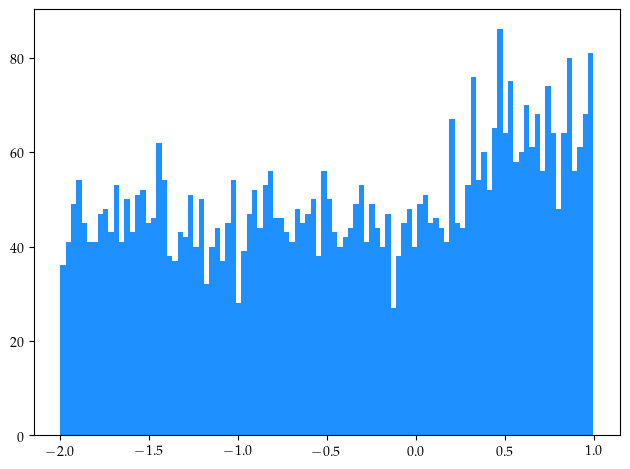

In [9]:
plt.hist(np.log10(posterior_samples["mwidth"]), bins=100)

Generating trace plots


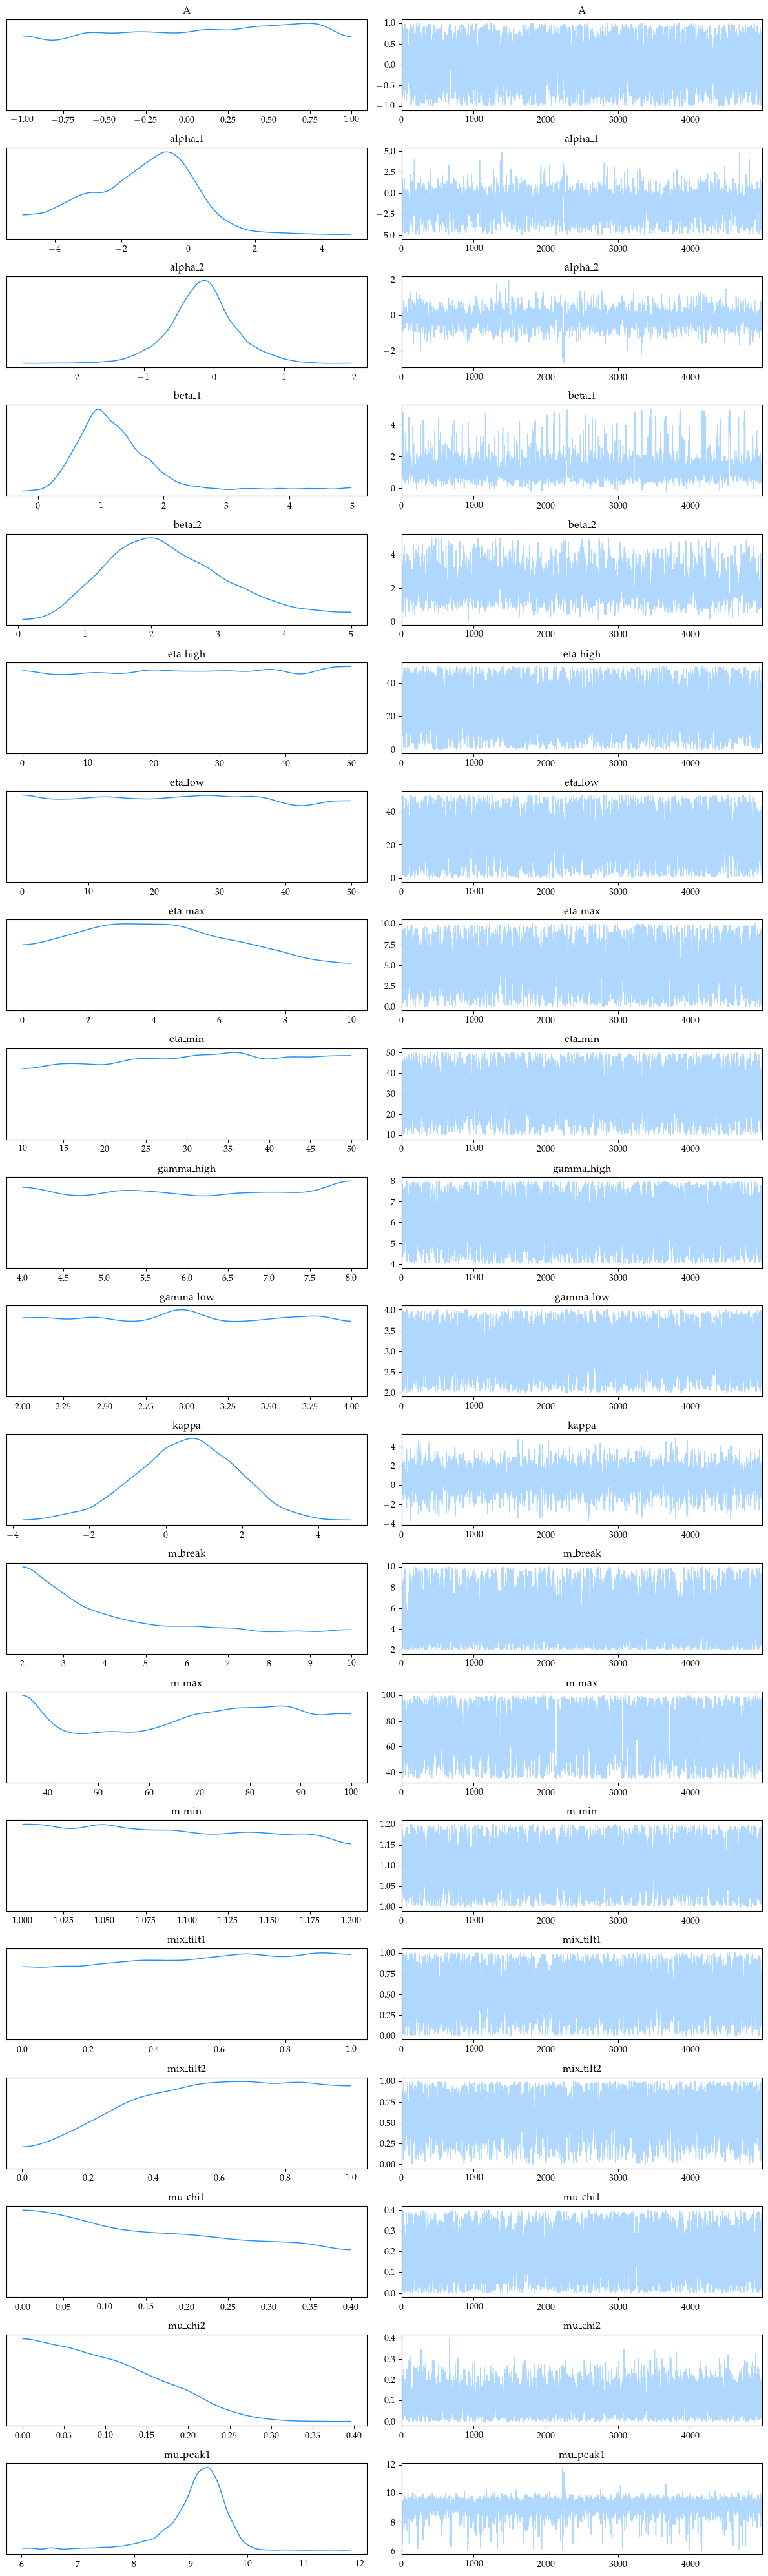

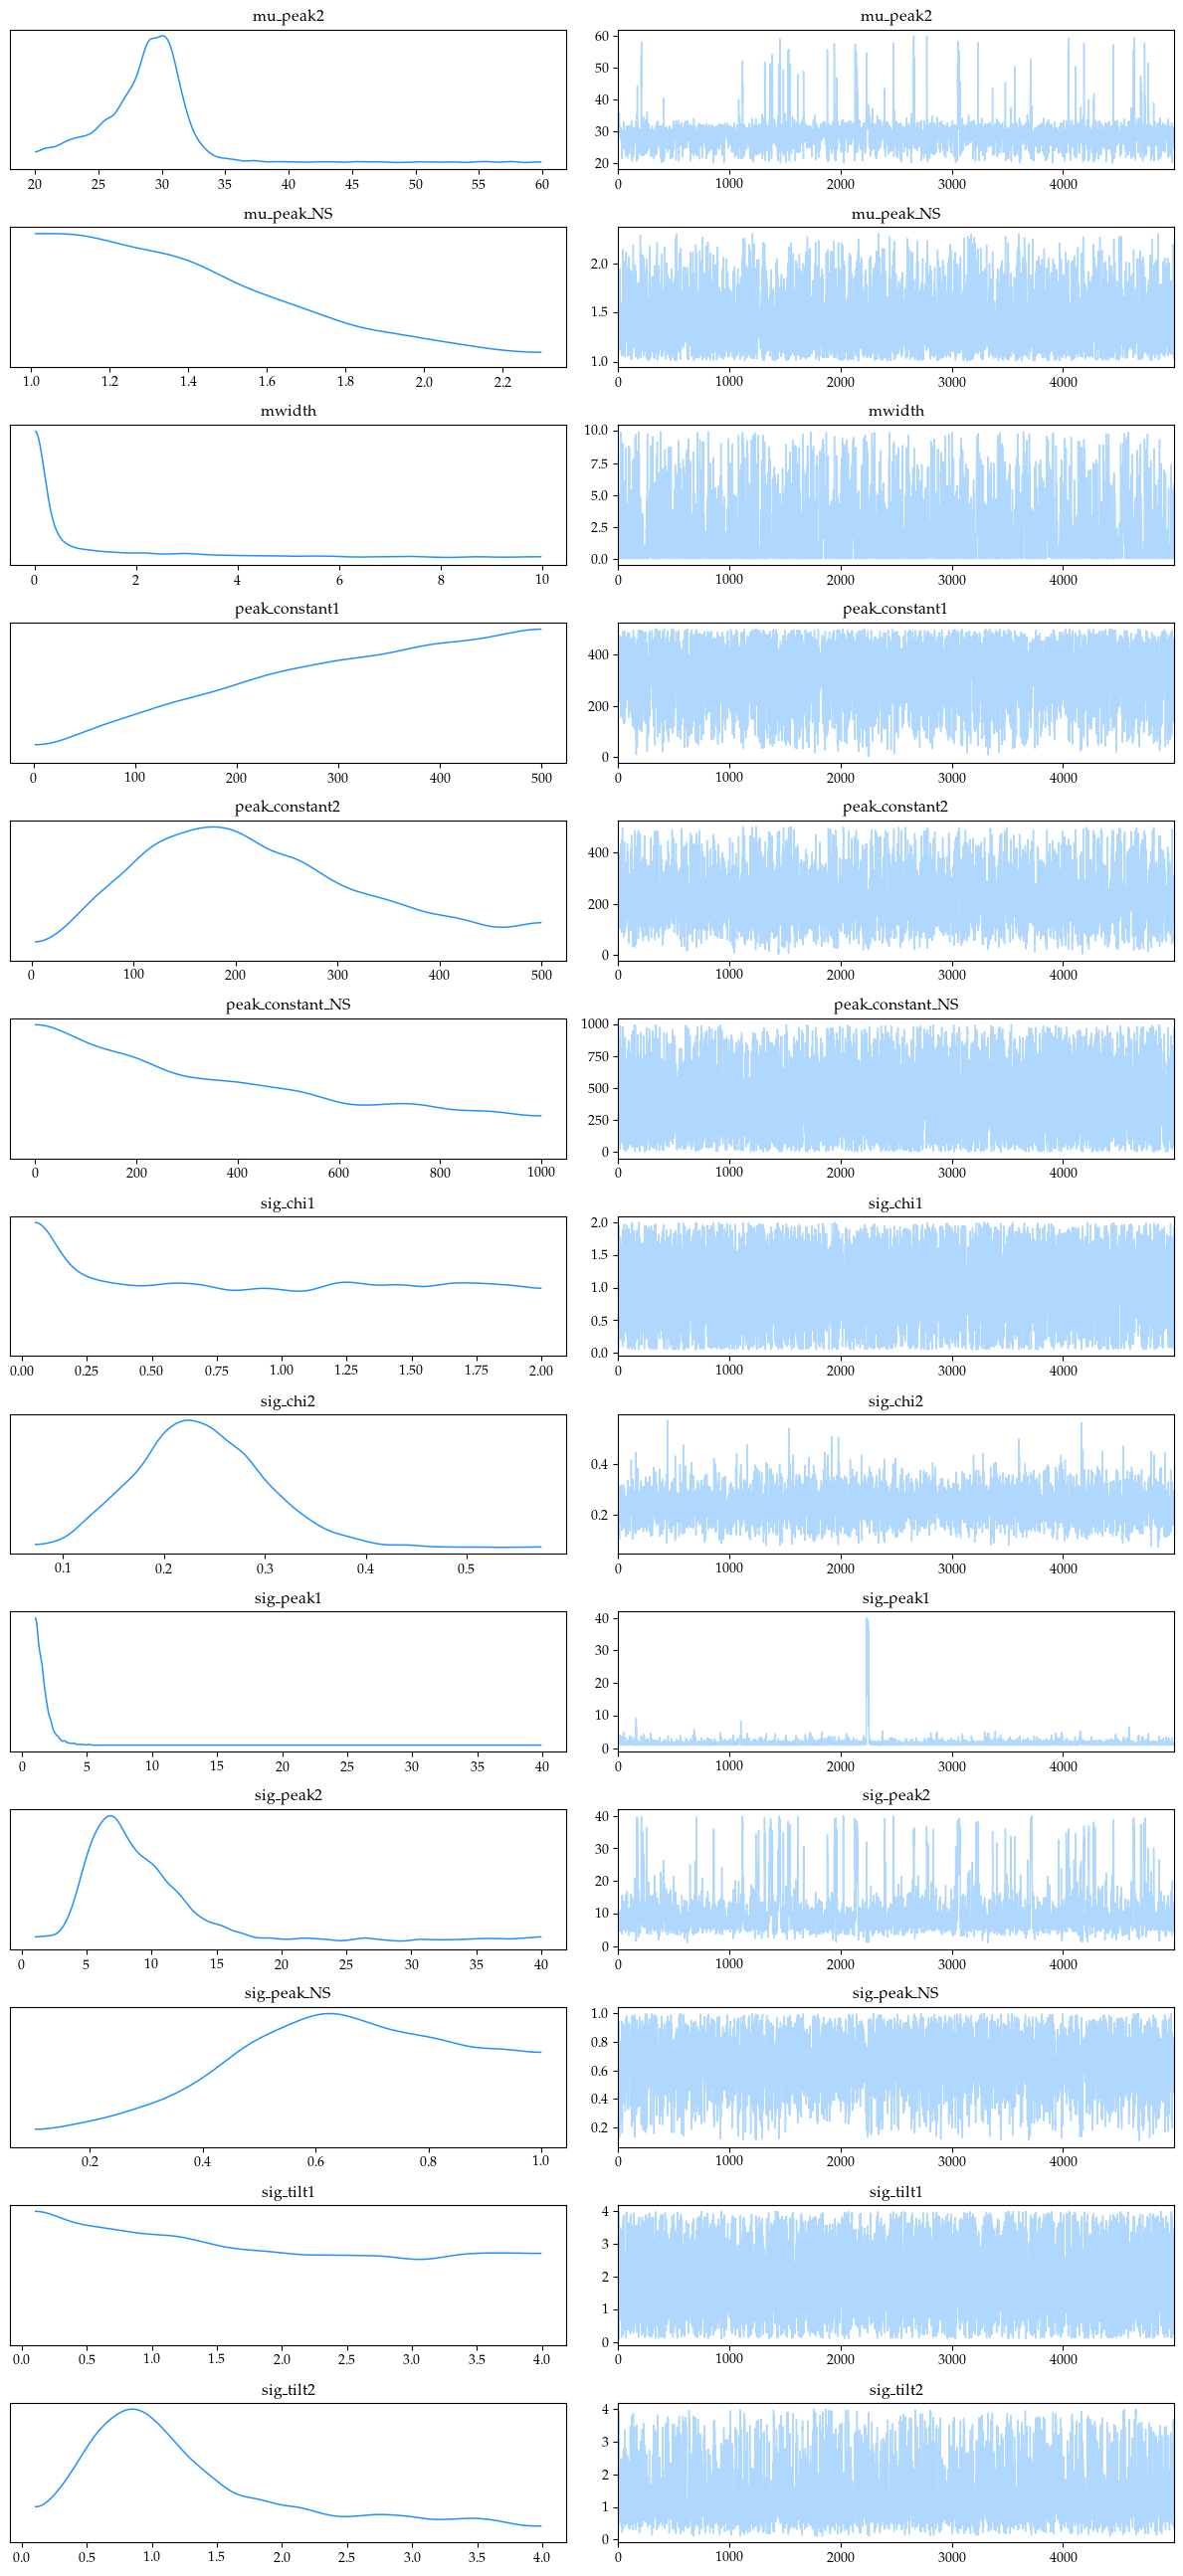

In [6]:
import os
import arviz as az

if os.path.exists("results/trace1.png") or os.path.exists("results/trace2.png") or os.path.exists("results/trace.png"):
    print("Trace plots already exist, skipping generation")
else:
    print("Generating trace plots")
    data = az.from_numpyro(mcmc)
    var_names_lst = get_non_deterministic_params(mcmc)

    if len(var_names_lst) >= 20:
        cut1 = var_names_lst[:20]
        cut2 = var_names_lst[20:]

        assert len(cut1) + len(cut2) == len(var_names_lst)

        az.plot_trace(data, var_names=cut1, compact=True)
        plt.savefig("results/trace1.png")
        az.plot_trace(data, var_names=cut2, compact=True)
        plt.savefig("results/trace2.png")
    else:
        az.plot_trace(data, var_names=var_names_lst, compact=True)
        plt.savefig("results/trace.png")

In [7]:
from model_vector import model_vector

import os

# try:
#     os.remove("results/postprocessed_samples")
# except: pass

if os.path.exists("results/postprocessed_samples"):
    with open("results/postprocessed_samples", "rb") as f:
        postprocessed_posterior_samples = pickle.load(f)
else:
    postprocessed_posterior_samples = add_postprocessing_effects(posterior_samples, model_vector)
    with open("results/postprocessed_samples", "wb") as f:
        pickle.dump(postprocessed_posterior_samples, f)

config = configparser.ConfigParser()
config.read('config/config.ini')
event_folder_name = config["DIRECTORIES"]["event_folder_name"]
event_file_name = config["DIRECTORIES"]["event_file_name"]
translate_dir = "../../"
events = numpy.loadtxt(translate_dir+event_folder_name+event_file_name, dtype=str)

for event_i in tqdm(range(len(postprocessed_posterior_samples["neff_events"].T))):
    neff = postprocessed_posterior_samples["neff_events"].T[event_i]
    filename = events[event_i][:14]
    plot_neff(neff, filename)
    plt.close()

Not in COURSE GRAIN: 66


100%|██████████| 66/66 [00:05<00:00, 11.26it/s]


In COURSE GRAIN: 0


100%|██████████| 66/66 [00:16<00:00,  4.11it/s]


/Users/utkarsh/GitHub/P_NS/sampler/runs/pdbNG_betaSplitSmooth_brokenG_1_full/postprocessing_functions.py:39: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  def utkarshWrapper(): plt.legend();plt.utkarshGrid();plt.gca().tick_params(direction='in', which='both', right=True,


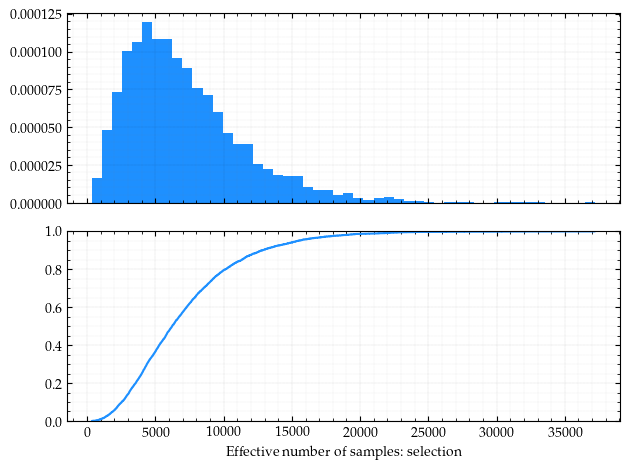

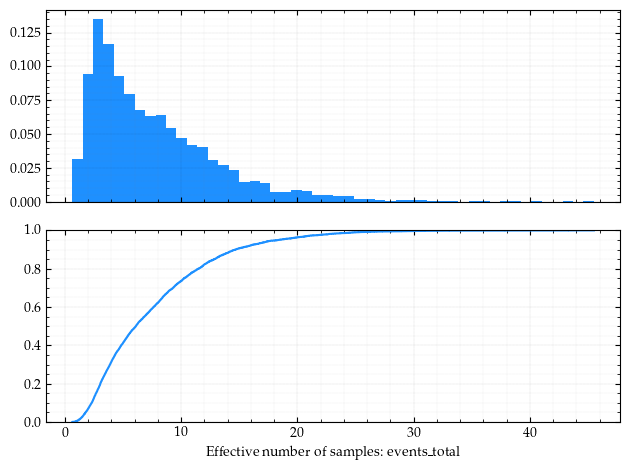

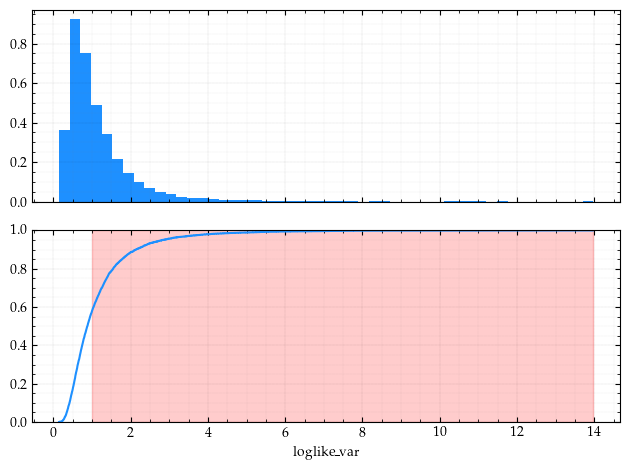

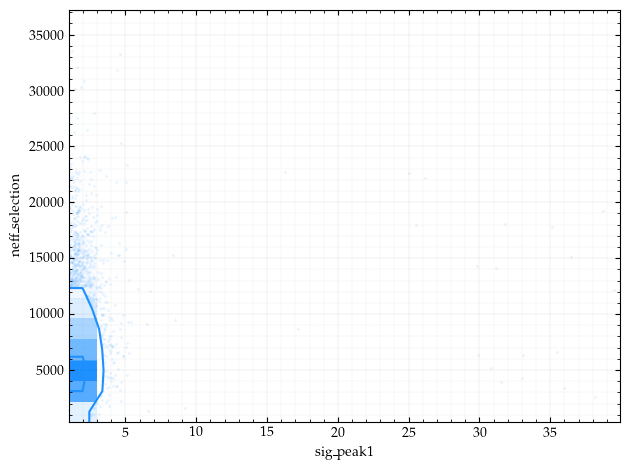

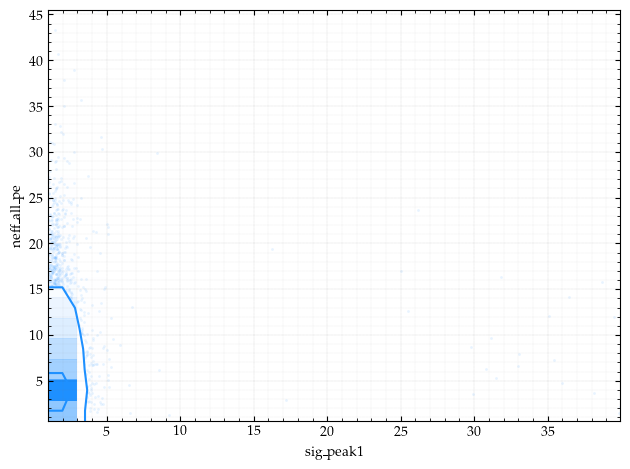

In [8]:
plot_neff(postprocessed_posterior_samples["neff_selection"], "selection")
plot_neff(postprocessed_posterior_samples["neff_events_total"], "events_total")
plot_neff(postprocessed_posterior_samples["loglike_var"], "loglike_var")
plt.xlabel("loglike_var")
plt.axvspan(1, max(postprocessed_posterior_samples["loglike_var"]), color = "red", label = "Var samples greater than 1", alpha = 0.2)
plt.savefig("results/loglike_var.png")

plt.figure()
plot_corner(postprocessed_posterior_samples["sig_peak1"], postprocessed_posterior_samples["neff_selection"], "sig_peak1", "neff_selection")
plt.figure()
plot_corner(postprocessed_posterior_samples["sig_peak1"], postprocessed_posterior_samples["neff_events_total"], "sig_peak1", "neff_all_pe")